## Importing Libraries <br>
In this case we only need the `numpy` and `matplotlib.pyplot` libraries because we are working with an **Image**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We read the our beach car image using the `.imread(location)` function from the python `matplotlib` library

In [2]:
beach_car = plt.imread(r'C:\Users\user\Pictures\beach_car.png')

Lets see our image using the `.imshow()` function

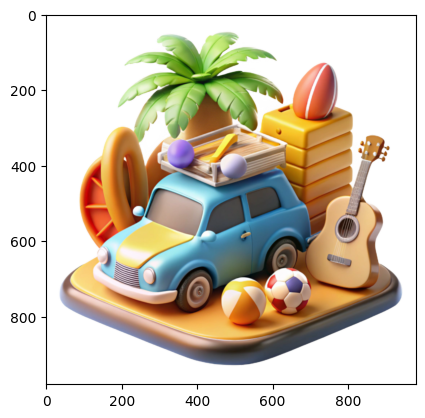

In [3]:
plt.imshow(beach_car)

Is good to get familiar with the dimension of your image
- the shape of our dimension is `(980, 980, 4)` 3D
- the `.reshape` function to change the dimension of outr image into a 2D image

In [4]:
beach_car.shape

features = np.reshape(beach_car, (beach_car.shape[0]*beach_car.shape[1],beach_car.shape[2]))

This function helps us to assign each data point to the closest `n` centroids

In [5]:
def closest_centroid(features, centroid):
    
    m,n = features.shape
    k = centroid.shape[0]

    initial = np.zeros(k)
    idx = np.zeros(m, dtype = int)
    
    for i in range(m):
        for j in range(k):
            initial[j] = np.sum((features[i] - centroid[j])**2)
        idx[i] = np.argmin(initial)

    return idx, centroid

this function helps assign the new positions of `n` centroid, by taking the mean of the assigned data points to the closest centroid

In [6]:
def move_centroid(features, idx, old_centroid):
    new_centroid = []

    k = old_centroid.shape[0]

    for k in range(k):
        points = features[idx == k]
        if points.shape[0] > 0:
            new_centroid.append(np.mean(points, axis = 0))
        else:
            new_centroid.append(features[np.random.randint(0, features.shape[0])])
    return np.array(new_centroid)
    

We did the following in the cell below:
- randomly selected our centroids
- assigning data points to the closest randomly selected `n` centroids
- we assign the new positions of `n` centroid, by taking the mean of the assigned data points to the closest centroid
- we substitute the values of the image with that of the centroids that is close to the data point
- Finally we display the new image 

this is the 1 time
this is the 2 time
this is the 3 time
this is the 4 time
this is the 5 time
this is the 6 time
this is the 7 time
this is the 8 time
this is the 9 time
this is the 10 time
this is the 11 time


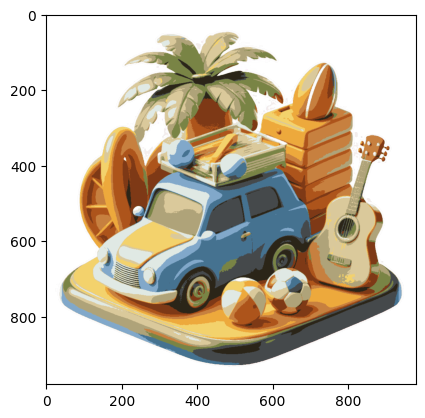

In [7]:
random_centroids = np.random.permutation(features)

centroids = features[random_centroids[:20].astype(int)]

real_centroids = centroids

for i in range(11):
    print(f'this is the {i+1} time')
    idx, real_centroids = closest_centroid(features, real_centroids)

    real_centroids = move_centroid(features, idx, real_centroids)


new_image = real_centroids[idx]

plt.imshow(new_image.reshape(beach_car.shape[0], beach_car.shape[1], beach_car.shape[2]))